In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [57]:
arquivo_sim = 'dados_simulacao.xlsx'
arquivo_rto = 'dados_rto.xlsx'

with open(arquivo_sim, 'rb') as f_sim:
    df_sim = pd.read_excel(f_sim, engine = 'openpyxl')

with open(arquivo_rto, 'rb') as f_rto:
    df_rto = pd.read_excel(f_rto, engine = 'openpyxl')
    

In [58]:
# Dados Simulação
t = df_sim.iloc[:, 0]
flujo_sim = df_sim.iloc[:, 1]
V = df_sim.iloc[:,2]
X = df_sim.iloc[:, 3]
S = df_sim.iloc[:, 4]
P = df_sim.iloc[:, 5]
O2 = df_sim.iloc[:, 6]
mu_sim = df_sim.iloc[:, 7]

# Dados RTO
t_rto = df_rto.iloc[:, 0]
flujo_rto = df_rto.iloc[:, 1]
V_rto = df_rto.iloc[:,2]
X_rto = df_rto.iloc[:, 3]
S_rto = df_rto.iloc[:, 4]
P_rto = df_rto.iloc[:, 5]
O2_rto = df_rto.iloc[:, 6]
mu_sim_rto = df_rto.iloc[:, 7]

# Parâmetros
t_batch_inicial_fin = 4
t_alim_inicio = 4
t_alim_fin = 9

# Tamanho das Fontes
plt.rcParams.update({
    'axes.titlesize': 20,       # Título dos eixos
    'axes.labelsize': 20,       # Rótulos dos eixos
    'xtick.labelsize': 20,      # Ticks do eixo X
    'ytick.labelsize': 20,      # Ticks do eixo Y
    'legend.fontsize': 12,      # Legenda
    'figure.titlesize': 20      # Título da figura
})

In [59]:
def add_phase_lines(ax, t_batch, t_feed_start, t_feed_end):
            ax.axvline(t_batch, color='gray', linestyle='--', lw=1.5) # Label removido
            ax.axvline(t_feed_start, color='orange', linestyle='--', lw=1.5) # Label removido
            ax.axvline(t_feed_end, color='purple', linestyle='--', lw=1.5) # Label removido


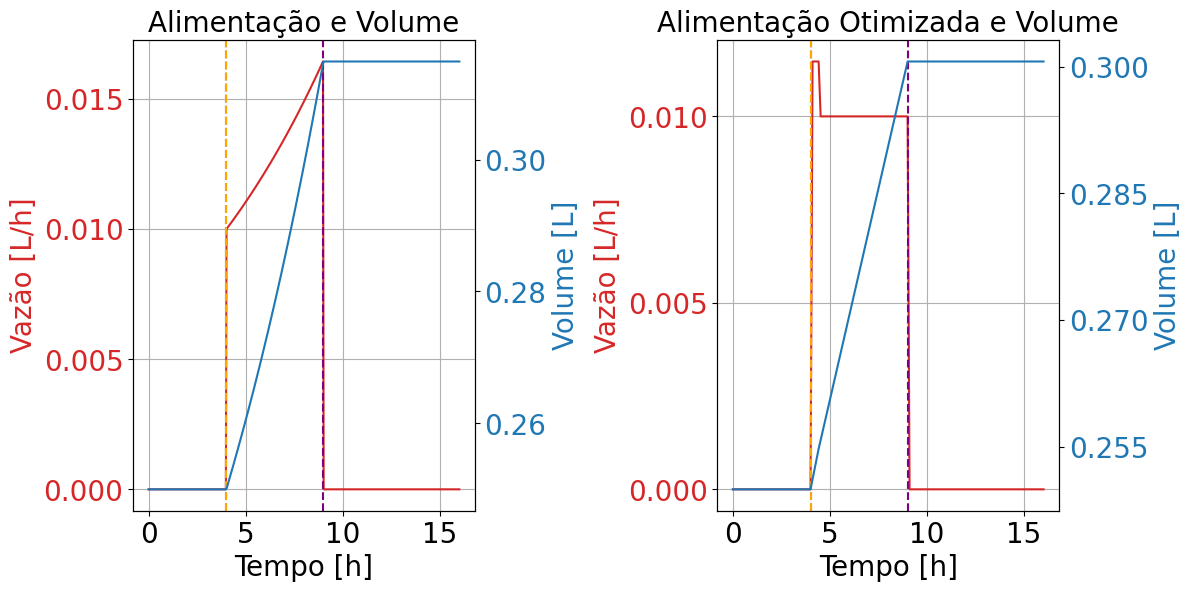

In [69]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Definindo o tamanho da figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Vazão e Volume da Simulação
# Vazão
color = 'tab:red'
ax1.plot(t, flujo_sim, color=color)
ax1.set_ylabel('Vazão [L/h]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Volume
ax1b = ax1.twinx()
color = 'tab:blue'
ax1b.plot(t, V, color=color, linestyle='-')
ax1b.set_ylabel('Volume [L]', color=color)
ax1b.tick_params(axis='y', labelcolor=color)

# Configurações do eixo X e título
ax1.set_xlabel('Tempo [h]')
ax1.grid(True)
ax1.set_title('Alimentação e Volume')

# Linhas de fase
add_phase_lines(ax1, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)

# Gráfico 2: Vazão e Volume da Otimização
# Vazão
color = 'tab:red'
ax2.plot(t_rto, flujo_rto, color=color)
ax2.set_ylabel('Vazão [L/h]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Volume
ax2b = ax2.twinx()
color = 'tab:blue'
ax2b.plot(t_rto, V_rto, color=color, linestyle='-')
ax2b.set_ylabel('Volume [L]', color=color)
ax2b.tick_params(axis='y', labelcolor=color)

# Configurações do eixo X e título
ax2.set_xlabel('Tempo [h]')
ax2.grid(True)
ax2.set_title('Alimentação Otimizada e Volume')

# Linhas de fase
add_phase_lines(ax2, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)

# Ajuste do número de ticks
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax1b.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=3))
ax2b.yaxis.set_major_locator(MaxNLocator(nbins=4))

plt.subplots_adjust(wspace=0.4)  # Aumentando o espaço horizontal entre os gráficos
plt.tight_layout(pad=1)  # Ajuste automático para evitar sobreposição

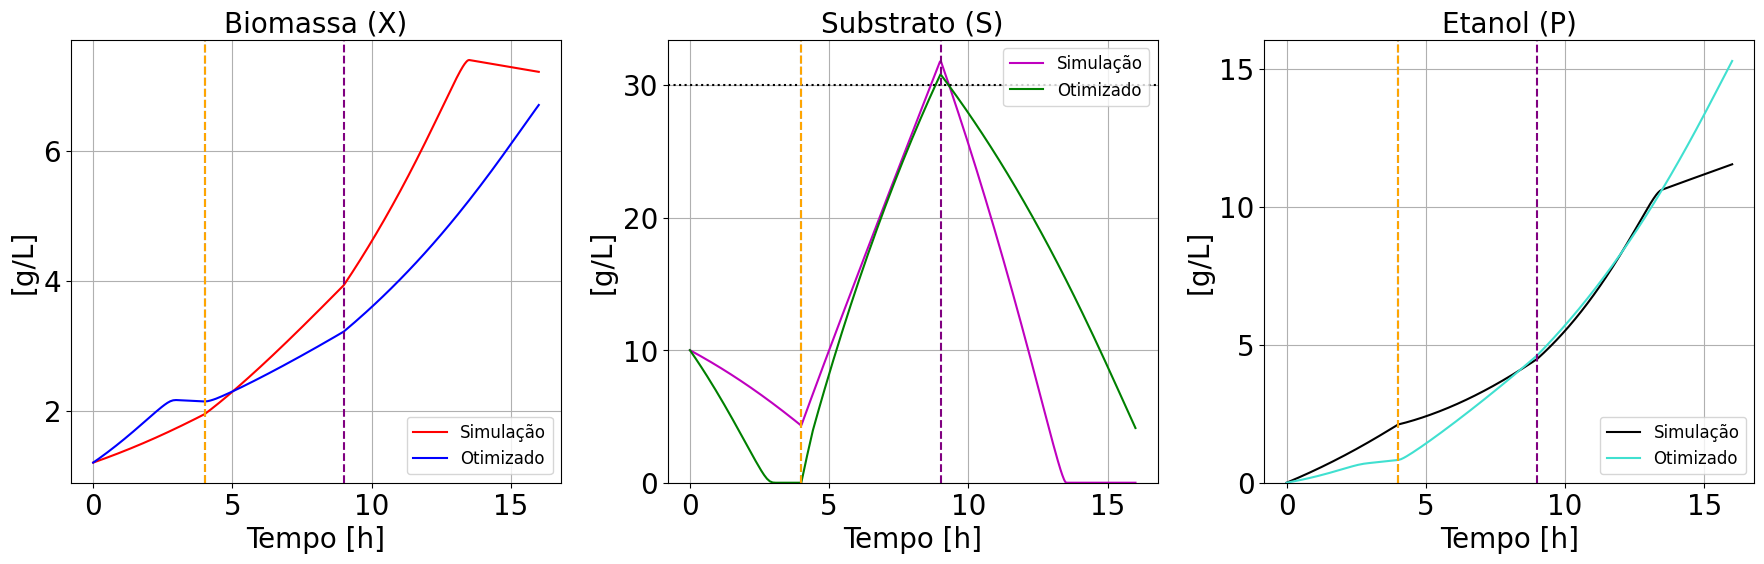

In [83]:
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(18, 6))

# 2. Biomassa (X)
ax2.plot(t, X, 'r-', label='Simulação')
ax2.plot(t_rto, X_rto, 'b-', label='Otimizado')
ax2.set_title('Biomassa (X)')
ax2.set_ylabel('[g/L]')
ax2.set_xlabel('Tempo [h]')
ax2.grid(True)
add_phase_lines(ax2, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)
ax2.legend()

# 3. Substrato (S)
ax3.plot(t, S, 'm-', label='Simulação')
ax3.plot(t_rto, S_rto, 'g-', label='Otimizado')
ax3.axhline(y=30, color='black', linestyle=':') #restrição
ax3.set_title('Substrato (S)')
ax3.set_ylabel('[g/L]')
ax3.set_xlabel('Tempo [h]')
ax3.grid(True)
ax3.set_ylim(bottom=0)
add_phase_lines(ax3, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)
ax3.legend()

# 4. Etanol (P)
ax4.plot(t, P, 'k-', label='Simulação')
ax4.plot(t_rto, P_rto, color='turquoise', label='Otimizado')
ax4.set_title('Etanol (P)')
ax4.set_ylabel('[g/L]')
ax4.set_xlabel('Tempo [h]')
ax4.grid(True)
ax4.set_ylim(bottom=0)
add_phase_lines(ax4, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)
ax4.legend()

# Ajuste do número de ticks
for ax in [ax2, ax3, ax4]:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))

# Ajuste do layout
plt.subplots_adjust(wspace=1)  # Aumentando o espaço horizontal entre os gráficos
plt.tight_layout(pad=2)  # Ajuste automático para evitar sobreposição

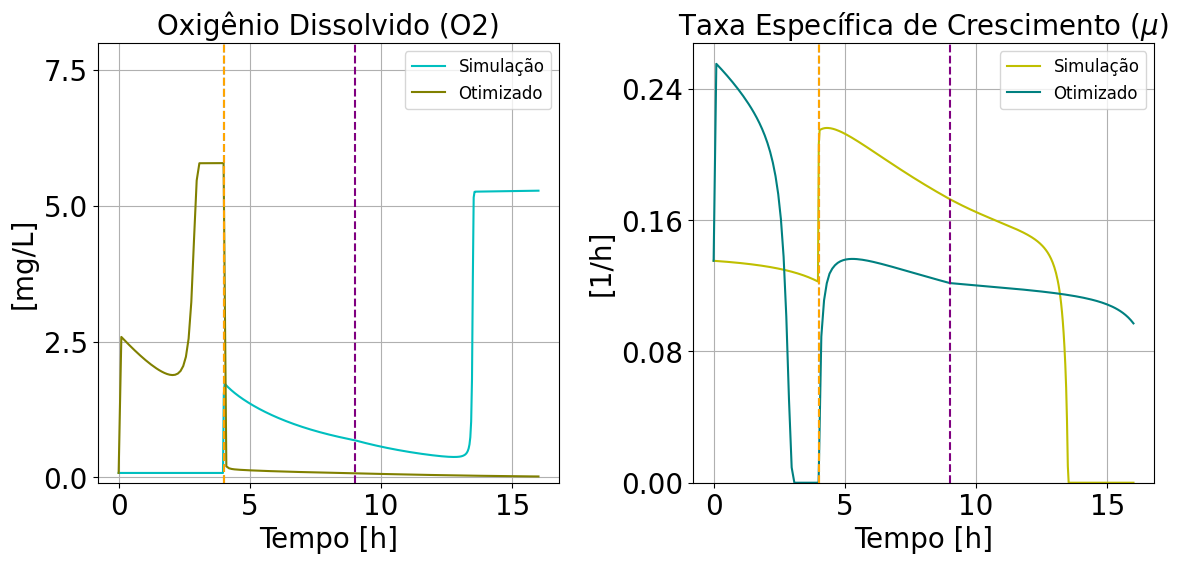

In [80]:
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 6))

# 5. Oxigênio Dissolvido
ax5.plot(t, O2, 'c-', label = 'Simulação')
ax5.plot(t_rto, O2_rto, color = 'olive', label = 'Otimizado')
ax5.set_title('Oxigênio Dissolvido (O2)') # Traduzido
ax5.set_ylabel('[mg/L]')
ax5.set_xlabel('Tempo [h]') # Traduzido
ax5.grid(True); ax5.set_ylim(bottom=-0.1, top=Cs*1.1 if 'Cs' in locals() and Cs is not None else 8.0) # Checagem adicional para Cs
add_phase_lines(ax5, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)
ax5.legend()
 
# Plotar mu_sim
ax6.plot(t, mu_sim, 'y-', label = 'Simulação')
ax6.plot(t_rto, mu_sim_rto, color = 'teal', label = 'Otimizado')
ax6.set_title(r'Taxa Específica de Crescimento ($\mu$)') # Traduzido e com LaTeX
ax6.set_ylabel('[1/h]')
ax6.set_xlabel('Tempo [h]') # Traduzido
ax6.grid(True); ax6.set_ylim(bottom=0)
add_phase_lines(ax6, t_batch_inicial_fin, t_alim_inicio, t_alim_fin)
ax6.legend()

# Ajuste do número de ticks
for ax in [ax5, ax6]:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))

# Ajuste do layout
plt.subplots_adjust(wspace=1)  # Aumentando o espaço horizontal entre os gráficos
plt.tight_layout(pad=2)  # Ajuste automático para evitar sobreposição